In [0]:
! wget 'http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz'
! wget 'http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz'
! wget 'http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz'
! wget 'http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz'


In [0]:
! gunzip train-images-idx3-ubyte.gz
! gunzip train-labels-idx1-ubyte.gz
! gunzip t10k-images-idx3-ubyte.gz
! gunzip t10k-labels-idx1-ubyte.gz

In [0]:
! ls

In [0]:
from mlxtend.data import loadlocal_mnist
import matplotlib.pyplot as plt
import numpy as np
from random import randrange
%matplotlib inline

Images, Labels = loadlocal_mnist(
        images_path='train-images-idx3-ubyte',
        labels_path='train-labels-idx1-ubyte')

img = Images[20111].reshape(28, 28)
plt.imshow(img)
print(Labels[20111])
#print(type(Labels[0]))
K = 60
totalnumberofiterations=60

testImages, testLabels = loadlocal_mnist(
        images_path='t10k-images-idx3-ubyte',
        labels_path='t10k-labels-idx1-ubyte')

img = testImages[201].reshape(28, 28)
plt.imshow(img)
print(testLabels[201])

In [0]:
# malhash lazma 
centroidRows = K
centroidCols = len(Images[0])
#gray_scale_limit = 256
#Centroids = np.random.randint(gray_scale_limit, size=(centroidRows, centroidCols))
#print(Centroids)

In [0]:
#Centroids=[Images[700],Images[200],
 #               Images[500],Images[3],
  #              Images[800],Images[1100],
   #             Images[1111],Images[2222],
    #            Images[3333],Images[4444],
     #           Images[5555],Images[1234],
      #          Images[4321],Images[2314],
       #         Images[15]
        #        ]
Centroids=[Images[0] for i in range(K)]
for i in range(K):
  x=randrange(5999)
  Centroids[i]=Images[x] 
  print(x)   

# malhash lazma
#print(Centroids[0])                
Centroids=np.array(Centroids)
#print(Centroids[0])

In [0]:
def Euclidean(centroid1d, img1d):
    sum = 0
    for i in range(len(centroid1d)):
        diff = centroid1d[i] - img1d[i]
        sum += (diff * diff)
    return int(np.sqrt(sum))

# print(Euclidean(Centroids[0], Images[0]))

In [0]:
def getImagesCentroid():
    CentroidCluster = [[] for i in range(len(Centroids))]
    #CentroidCluster=
    for j in range(60000):
        min = int(1e9)
        imageCentroid = -2
        for i in range(len(Centroids)):
             #temp = Euclidean(Centroids[i], Images[j])
            temp=np.linalg.norm (Centroids[i] - Images[j])
            if(temp < min):
                min = temp
                imageCentroid = i
        
        CentroidCluster[imageCentroid].append(j)

    return CentroidCluster

In [0]:
def getNewCentroidsfarid(centroidClusters):
    newCentroids2d = []

    for i in range(K):
        if len(centroidClusters[i]) == 0:
            print(i , " is empty")
            newCentroids2d.append(Centroids[i])
            continue
        
        newCentroid1d = [0 for j in range(len(Images[0]))]

        for el in centroidClusters[i]:
            for index in range(centroidCols):
                newCentroid1d[index] += Images[el][index]
        
        siize = len(centroidClusters[i])
        for j in range(centroidCols):
            newCentroid1d[j] //= siize

        newCentroids2d.append(newCentroid1d)
    
    return newCentroids2d

In [0]:
def getlossfunction(centroidClusters,Centroids):
  sum=0;
  for i in range(K):
     for j in centroidClusters[i]:
       sum=sum+np.linalg.norm (np.array(Centroids[i])-np.array(Images[j]) ).astype(int)

  return sum      



In [0]:
#Centroids = np.random.randint(gray_scale_limit, size=(centroidRows, centroidCols))
centroidClusters = getImagesCentroid()
newCentroids = getNewCentroidsfarid(centroidClusters)
print(len(newCentroids))
losses=[0 for m in range(totalnumberofiterations)]
counterofloss=0

#print("Sizes : ")
#for i in range(len(newCentroids)):
#    print(len(newCentroids[i]))
   # print(newCentroids)

30


In [0]:
numberofiterations =50
for i in range(numberofiterations):
    print("number of iteration :")
    print(i)
    print("\n")
    Centroids=newCentroids.copy()
    centroidClusters = getImagesCentroid()
    newCentroids = getNewCentroidsfarid(centroidClusters)
    losses[counterofloss]=getlossfunction(centroidClusters,Centroids)
    counterofloss=counterofloss+1
    error=int(np.linalg.norm ( Centroids - np.array(newCentroids)))
    if(error==0): 
      print("you reached a steady state")
      break;
    


Centroids=newCentroids.copy()





[102184165, 97492756, 94587283, 93372030, 92948539, 92746464, 92628042, 92548625, 92488054, 92435478, 92390070, 92345755, 92300100, 92246932, 92192810, 92139244, 92081738, 92020903, 91950620, 91879353, 91811014, 91744344, 91679197, 91616147, 91556650, 91501930, 91457135, 91419365, 91391069, 91370439, 91355113, 91342110, 91330346, 91319542, 91311933, 91305496, 91297762, 91292440, 91287583, 91282781, 91277870, 91272941, 91268949, 91265536, 91262193, 91259117, 91256716, 91253272, 91250646, 91247939, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


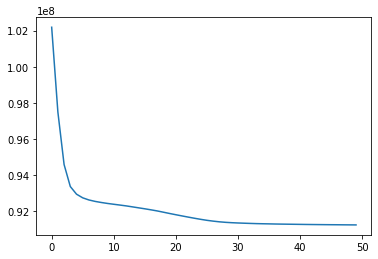

In [0]:

print(losses)
array=[i for i in range(50)]
array2=[0 for i in range(50)]
plt.figure()
for j in range(50):
  array2[j]=losses[j]
plt.plot(array,array2)


In [0]:
def getclusterlabel(centroidClusters):
  centroidlabels=[0 for m in range(K)]
  #frequencyarray=[0 for m in range(10)]

  for i in range(K):
     frequencyarray=[0 for m in range(10)]
     for j in range(len(centroidClusters[i])):
       zed=Labels[centroidClusters[i][j]].astype(int)
       
       frequencyarray[zed]=1+frequencyarray[zed]
       temp=frequencyarray.index(max(frequencyarray))
     centroidlabels[i]=temp
    # print(centroidlabels[i]) 

  return centroidlabels       



    


In [0]:
     clusterlables=getclusterlabel(centroidClusters)        

In [0]:
#print(Centroids[0])
#print(len(Centroids[0]))
#print(newCentroids[8])
for i in range(K):
     img = np.array(newCentroids[i]).reshape(28, 28)
     plt.figure()
     plt.imshow(img)




In [0]:
#show representatives

img = Images[testcentroidClusters[14][359]].reshape(28,28)
plt.figure()
plt.imshow(img)
img = Images[testcentroidClusters[14][360]].reshape(28,28)
plt.figure()
plt.imshow(img)


In [0]:
print(clusterlables)

In [0]:
#mesh mohema
for i in range(len(centroidClusters)):
  print(len(centroidClusters[i]))

In [0]:
#malhsah lazma
k=0
h=14
for i in range(len(testcentroidClusters[h])):

  if(Labels[testcentroidClusters[h][i]].astype(int)!=clusterlables[h]):
     k=k+1
     print("my label ")
     print( Labels[testcentroidClusters[h][i]].astype(int))
     print("cluster label ")
     print( clusterlables[h])
     print ("my index")
     print (i)

print(k)


In [0]:
def getImagesCentroidtest():
    CentroidCluster = [[] for i in range(len(Centroids))]
    for j in range(10000):
        min = int(1e9)
        imageCentroid = -2
        for i in range(len(Centroids)):
            #print("hey")
            # temp = Euclidean(Centroids[i], testImages[j])
            temp=np.linalg.norm ( Centroids[i] - testImages[j] )
            if(temp < min):
                min = temp
                imageCentroid = i
        
        CentroidCluster[imageCentroid].append(j)

    return CentroidCluster

In [0]:
testcentroidClusters = getImagesCentroidtest()


In [0]:
#last mohema
k=0
for j in range(len(testcentroidClusters)):
    for i in range(len(testcentroidClusters[j])):

      if(testLabels[testcentroidClusters[j][i]].astype(int)==clusterlables[j]):
        k=k+1
    #print(testLabels[testcentroidClusters[14][i]].astype(int))


accuracy=(k/10000)*100
print(accuracy)

In [0]:
for i in range(len(testcentroidClusters)):
  print(len(testcentroidClusters[i]))

In [0]:
for i in range(3):
    print("number of iteration :")
    print(i)
    print("\n")
    Centroids=newCentroids.copy()
    centroidClusters = getImagesCentroid()
    newCentroids = getNewCentroidsfarid(centroidClusters)
    losses[counterofloss]=getlossfunction(centroidClusters,Centroids)
    counterofloss=counterofloss+1
    error=int(np.linalg.norm ( Centroids - np.array(newCentroids)))
    if(error==0): 
      print("you reached a steady state")
      break;
    
Centroids=newCentroids.copy()

In [0]:
print(losses)

In [0]:
testcentroidClusters = getImagesCentroidtest()


In [0]:
k=0
for j in range(len(testcentroidClusters)):
    for i in range(len(testcentroidClusters[j])):

      if(testLabels[testcentroidClusters[j][i]].astype(int)==clusterlables[j]):
        k=k+1
    #print(testLabels[testcentroidClusters[14][i]].astype(int))

print(k)

In [0]:
counterofloss=0
for i in range(9):
    print("number of iteration :")
    print(i)
    print("\n")
    Centroids=newCentroids.copy()
    centroidClusters = getImagesCentroid()
    newCentroids = getNewCentroidsfarid(centroidClusters)
    losses[counterofloss]=getlossfunction(centroidClusters,Centroids)
    counterofloss=counterofloss+1
    error=int(np.linalg.norm ( Centroids - np.array(newCentroids)))
    if(error==0): 
      print("saba7 el equilibrium yabo 3amo")
      break;
    
    


Centroids=newCentroids.copy()
testcentroidClusters = getImagesCentroidtest()
k=0
for j in range(len(testcentroidClusters)):
    for i in range(len(testcentroidClusters[j])):

      if(testLabels[testcentroidClusters[j][i]].astype(int)==clusterlables[j]):
        k=k+1
    #print(testLabels[testcentroidClusters[14][i]].astype(int))

print(k)

In [0]:
print(losses)

[7326483597526869569, 7325118768616567184, 7323498292776334532, 7321728798996433472, 7321167966056377252, 7321627506722955812, 7321769779071864833, 7321977599410356449, 7323064427423989937]


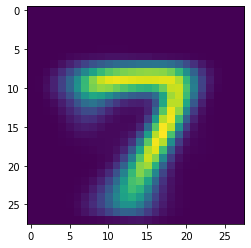

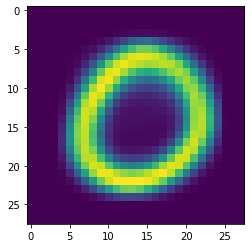

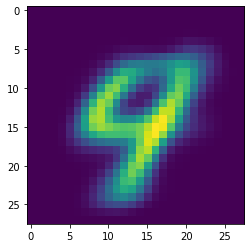

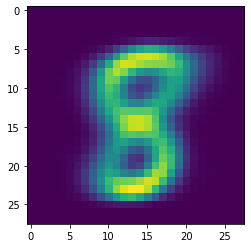

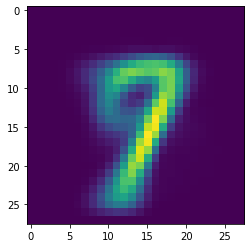

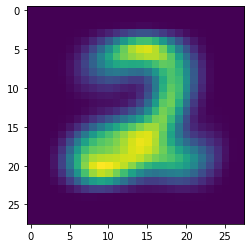

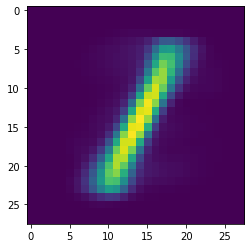

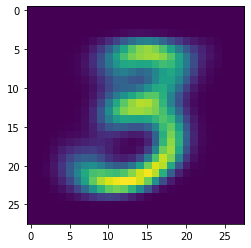

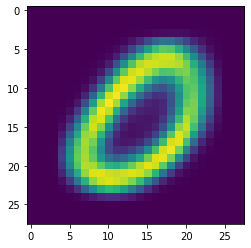

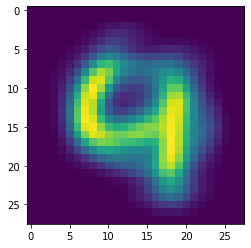

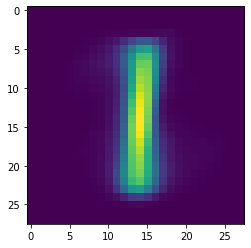

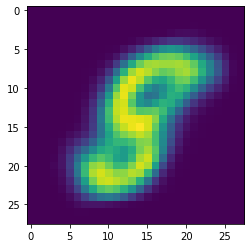

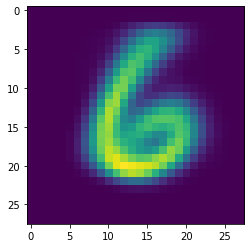

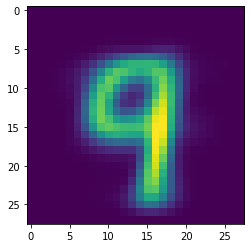

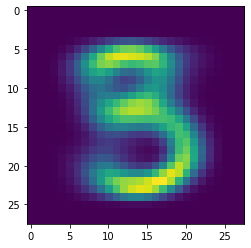

In [0]:
for i in range(K):
     img = np.array(newCentroids[i]).reshape(28, 28)
     plt.figure()
     plt.imshow(img)



     